#   USE AI EDA

In [ ]:
Act as data scientist please show me the code ,to perfom EDA in python ,
using libreries like,pandas,numpy, 
 matplotlib and seaborn, on the dataset 
,on the dataset loaded by sns.load_dataset("titanic"), 
 perform step by step EDA and code should be refind

- **Exploratory Data Analysis (EDA) of Titanic Dataset**

In [ ]:
I'll perform a comprehensive EDA on the Titanic dataset using Python's data science stack.  
Here's a refined, step-by-step approach:

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:

# Set aesthetic parameters for visualizations
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12
%matplotlib inline  # For Jupyter notebooks


UsageError: unrecognized arguments: # For Jupyter notebooks


In [4]:

# Load the dataset
df = sns.load_dataset("titanic")

# Display basic information
print("="*80)
print("DATASET SHAPE AND BASIC INFO")
print("="*80)
print(f"Dataset shape: {df.shape}\n")
print(df.info())
print("\n" + "="*80)
print("FIRST FEW ROWS")
print("="*80)
print(df.head())

DATASET SHAPE AND BASIC INFO
Dataset shape: (891, 15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None

FIRST FEW ROWS
   

In [5]:

# Check for missing values
print("\n" + "="*80)
print("MISSING VALUES ANALYSIS")
print("="*80)
missing_values = df.isnull().sum()
missing_pct = (df.isnull().mean() * 100).round(2)
missing_df = pd.DataFrame({'Missing Count': missing_values, 'Percentage (%)': missing_pct})
print(missing_df[missing_df['Missing Count'] > 0].sort_values(by='Missing Count', ascending=False))


MISSING VALUES ANALYSIS
             Missing Count  Percentage (%)
deck                   688           77.22
age                    177           19.87
embarked                 2            0.22
embark_town              2            0.22


In [6]:

# Basic statistics for numerical features
print("\n" + "="*80)
print("DESCRIPTIVE STATISTICS FOR NUMERICAL FEATURES")
print("="*80)
print(df.describe(include=['int64', 'float64']).T)


DESCRIPTIVE STATISTICS FOR NUMERICAL FEATURES
          count       mean        std   min      25%      50%   75%       max
survived  891.0   0.383838   0.486592  0.00   0.0000   0.0000   1.0    1.0000
pclass    891.0   2.308642   0.836071  1.00   2.0000   3.0000   3.0    3.0000
age       714.0  29.699118  14.526497  0.42  20.1250  28.0000  38.0   80.0000
sibsp     891.0   0.523008   1.102743  0.00   0.0000   0.0000   1.0    8.0000
parch     891.0   0.381594   0.806057  0.00   0.0000   0.0000   0.0    6.0000
fare      891.0  32.204208  49.693429  0.00   7.9104  14.4542  31.0  512.3292


In [7]:

# Basic statistics for categorical features
print("\n" + "="*80)
print("DESCRIPTIVE STATISTICS FOR CATEGORICAL FEATURES")
print("="*80)
print(df.describe(include=['object', 'category', 'bool']).T)


DESCRIPTIVE STATISTICS FOR CATEGORICAL FEATURES
            count unique          top freq
sex           891      2         male  577
embarked      889      3            S  644
class         891      3        Third  491
who           891      3          man  537
adult_male    891      2         True  537
deck          203      7            C   59
embark_town   889      3  Southampton  644
alive         891      2           no  549
alone         891      2         True  537


C:\Users\hp\AppData\Local\Temp\ipykernel_8916\1189353531.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='survived', data=df, palette='viridis')


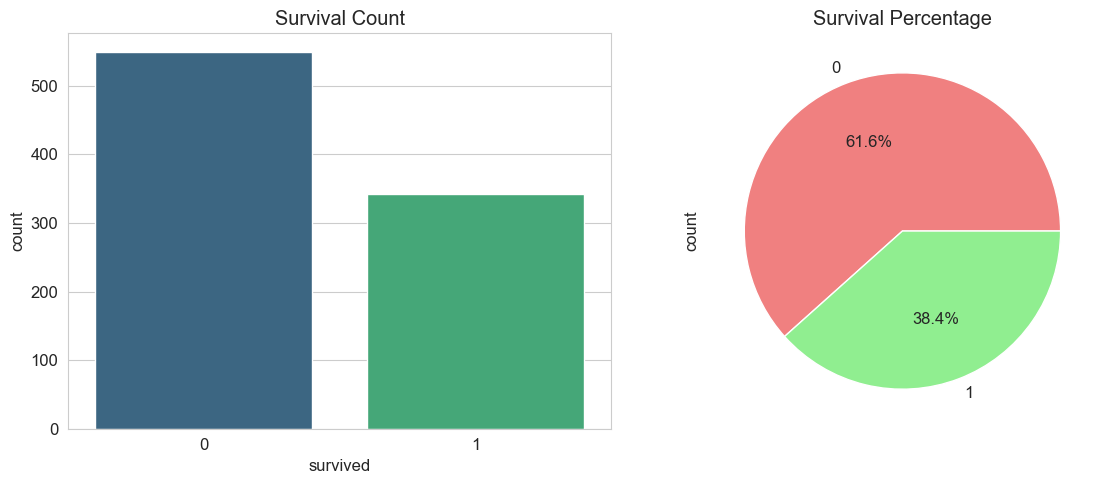

In [8]:

# =============================================
# DATA VISUALIZATION
# =============================================

# 1. Target Variable Distribution (Survived)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='survived', data=df, palette='viridis')
plt.title('Survival Count')
plt.subplot(1, 2, 2)
df['survived'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'])
plt.title('Survival Percentage')
plt.tight_layout()
plt.show()


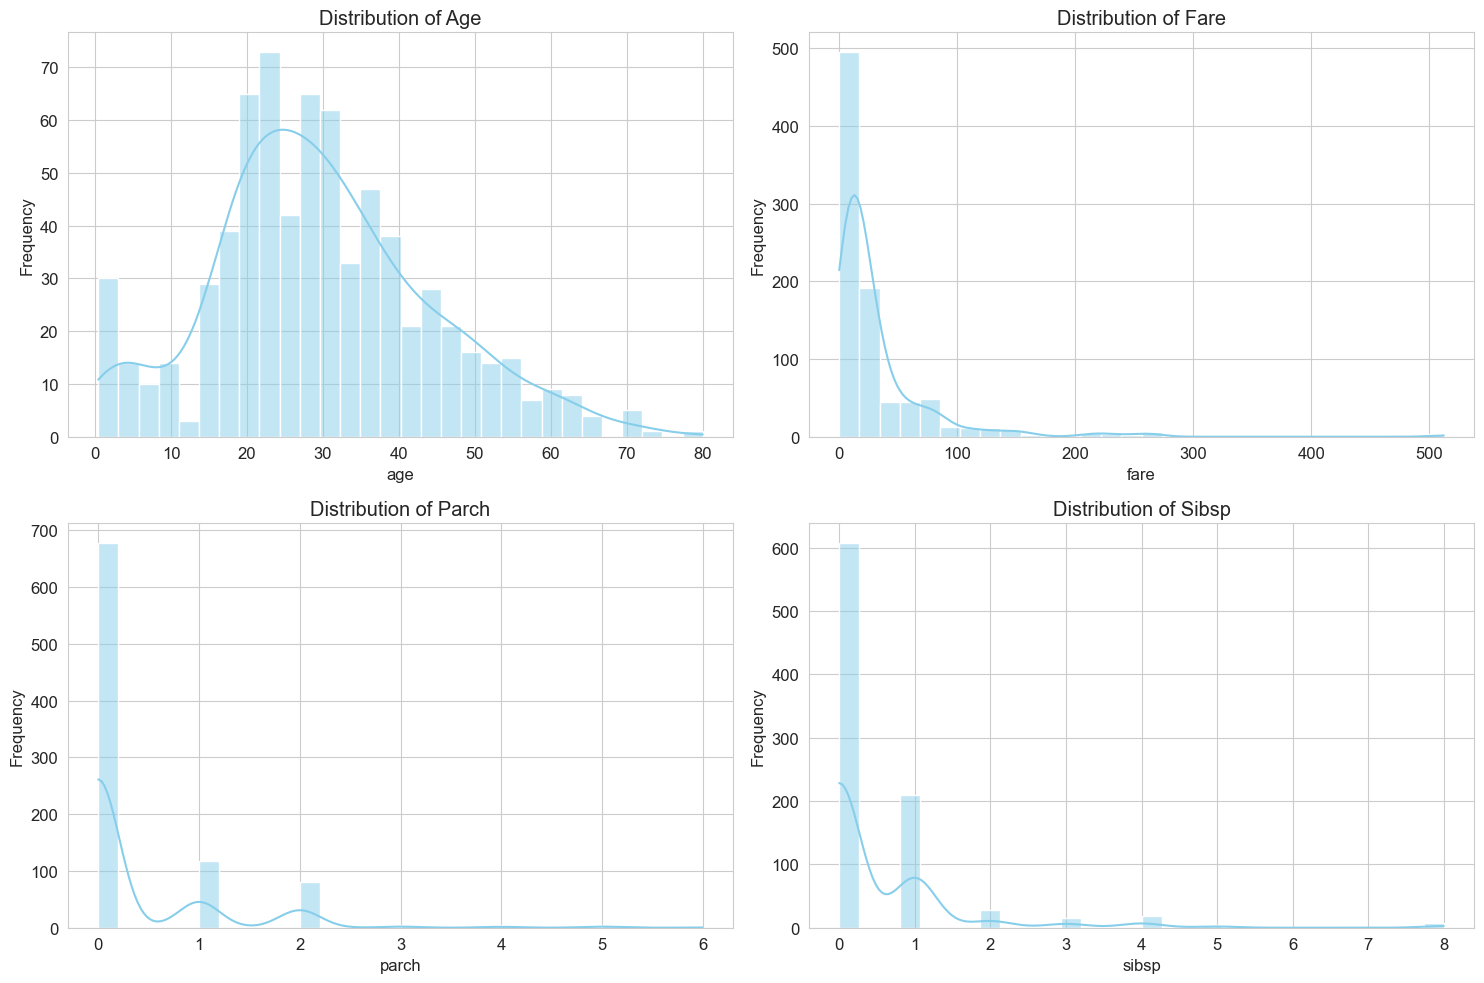

In [9]:

# 2. Numerical Features Distribution
numerical_cols = ['age', 'fare', 'parch', 'sibsp']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, color='skyblue', bins=30)
    plt.title(f'Distribution of {col.capitalize()}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_8916\2959086435.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')
C:\Users\hp\AppData\Local\Temp\ipykernel_8916\2959086435.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')
C:\Users\hp\AppData\Local\Temp\ipykernel_8916\2959086435.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')
C:\Users\hp\AppData\Local\Temp\ipykernel_8916\2959086435.py:9: FutureWarning: 

Passing `palette` without ass

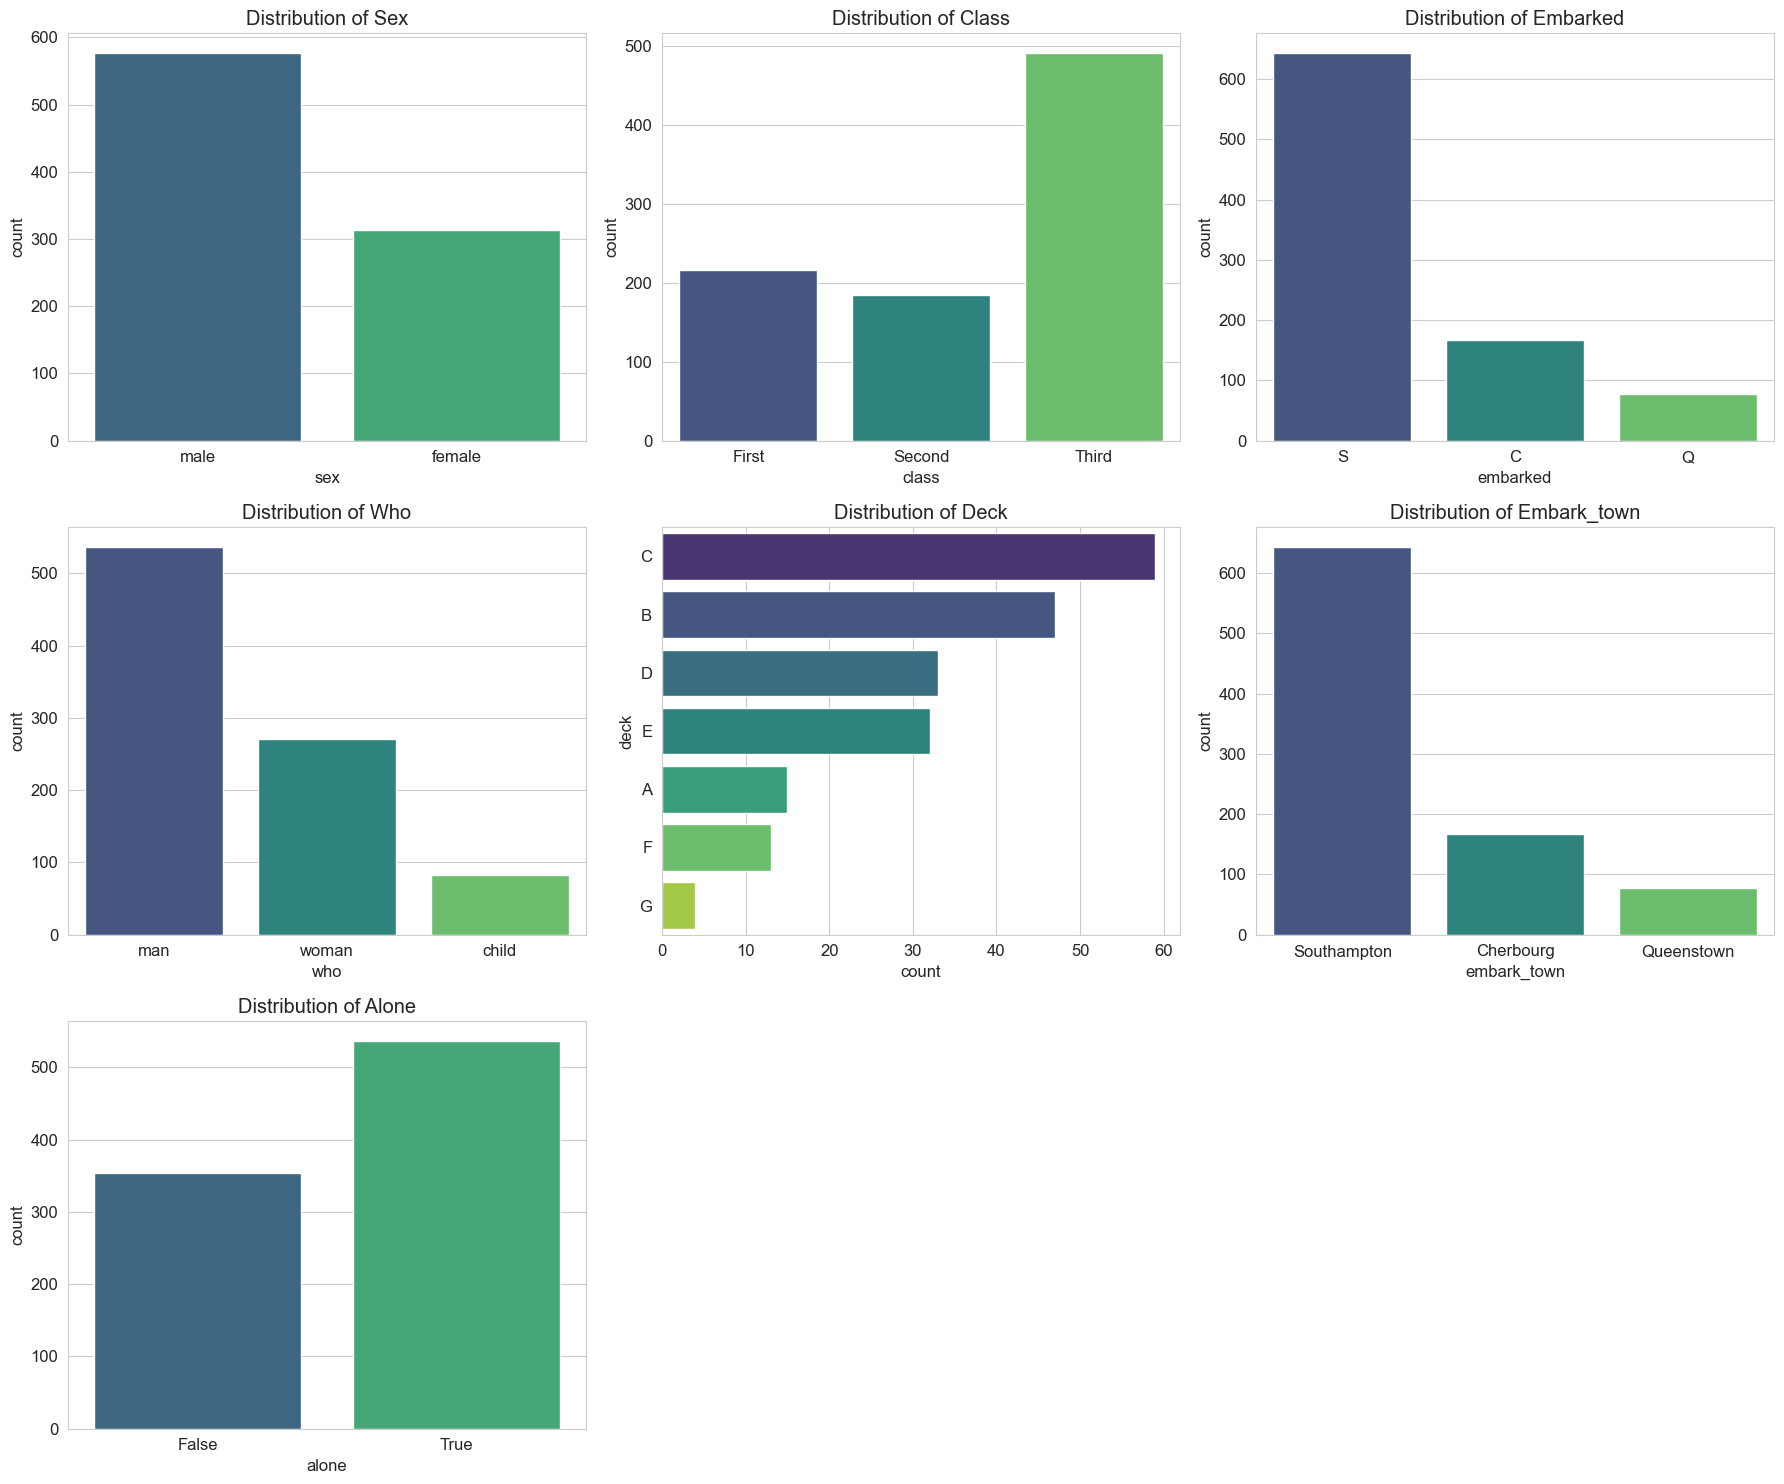

In [10]:


# 3. Categorical Features Distribution
categorical_cols = ['sex', 'class', 'embarked', 'who', 'deck', 'embark_town', 'alone']
plt.figure(figsize=(18, 15))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    if df[col].nunique() > 5:  # For columns with many categories, show top 10
        sns.countplot(y=col, data=df, order=df[col].value_counts().iloc[:10].index, palette='viridis')
    else:
        sns.countplot(x=col, data=df, palette='viridis')
    plt.title(f'Distribution of {col.capitalize()}')
    plt.tight_layout()
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_8916\1194948214.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sex', y='survived', data=df, palette='coolwarm')
C:\Users\hp\AppData\Local\Temp\ipykernel_8916\1194948214.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='class', y='survived', data=df, palette='coolwarm', order=['First', 'Second', 'Third'])
C:\Users\hp\AppData\Local\Temp\ipykernel_8916\1194948214.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='embark_town', y='survived', data=df, palette='coolwarm')


Text(0.5, 1.0, 'Survival Rate by Embark Town')

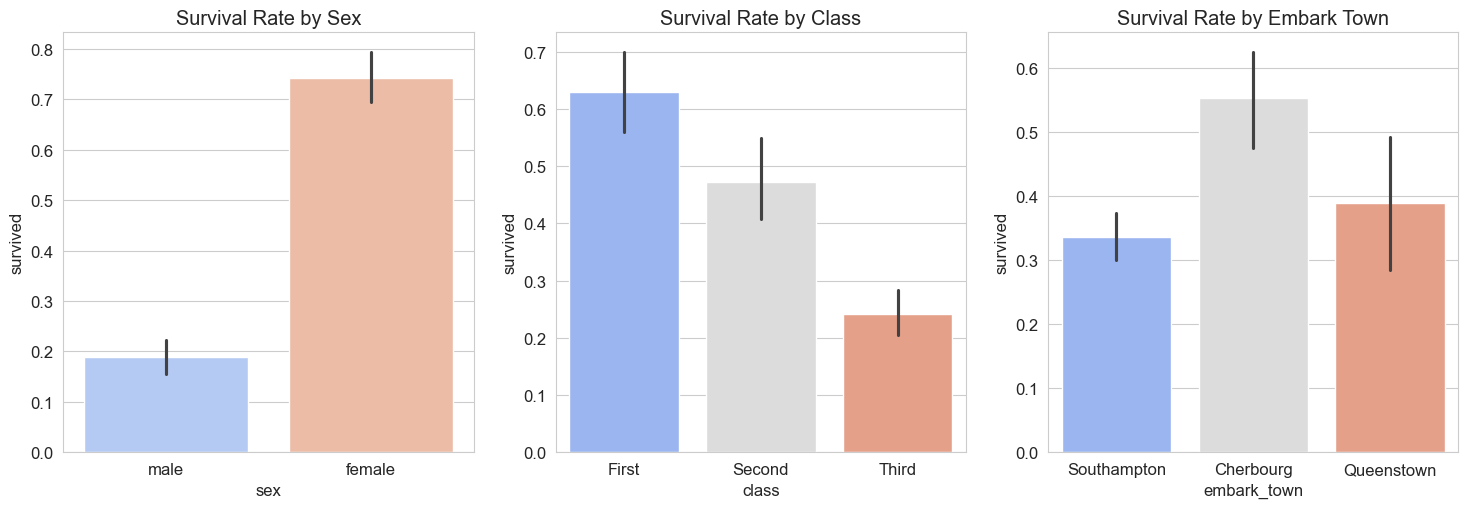

In [11]:



# 4. Survival Rate by Different Features
plt.figure(figsize=(18, 12))

# Survival by Sex
plt.subplot(2, 3, 1)
sns.barplot(x='sex', y='survived', data=df, palette='coolwarm')
plt.title('Survival Rate by Sex')

# Survival by Class
plt.subplot(2, 3, 2)
sns.barplot(x='class', y='survived', data=df, palette='coolwarm', order=['First', 'Second', 'Third'])
plt.title('Survival Rate by Class')

# Survival by Embark Town
plt.subplot(2, 3, 3)
sns.barplot(x='embark_town', y='survived', data=df, palette='coolwarm')
plt.title('Survival Rate by Embark Town')

C:\Users\hp\AppData\Local\Temp\ipykernel_8916\3496341623.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age_group', y='survived', data=df, palette='coolwarm')
C:\Users\hp\AppData\Local\Temp\ipykernel_8916\3496341623.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='family_size', y='survived', data=df, palette='coolwarm')
C:\Users\hp\AppData\Local\Temp\ipykernel_8916\3496341623.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='alone', y='survived', data=df, palette='coolwarm')


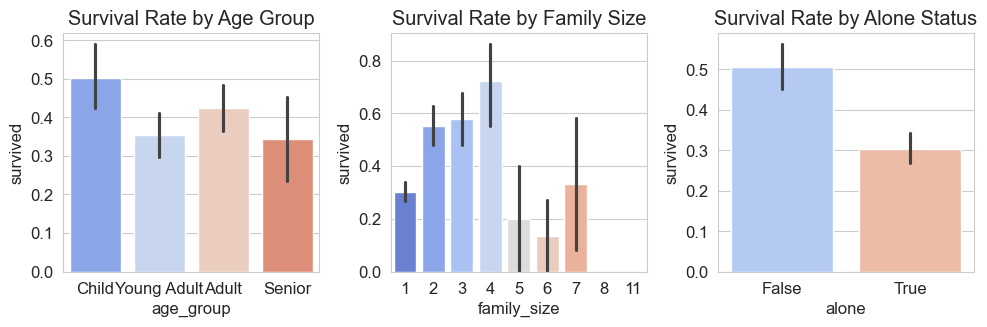

In [12]:

# Survival by Age Groups
plt.subplot(2, 3, 4)
df['age_group'] = pd.cut(df['age'], bins=[0, 18, 30, 50, 100], labels=['Child', 'Young Adult', 'Adult', 'Senior'])
sns.barplot(x='age_group', y='survived', data=df, palette='coolwarm')
plt.title('Survival Rate by Age Group')

# Survival by Family Size
plt.subplot(2, 3, 5)
df['family_size'] = df['sibsp'] + df['parch'] + 1
sns.barplot(x='family_size', y='survived', data=df, palette='coolwarm')
plt.title('Survival Rate by Family Size')

# Survival by Alone Status
plt.subplot(2, 3, 6)
sns.barplot(x='alone', y='survived', data=df, palette='coolwarm')
plt.title('Survival Rate by Alone Status')

plt.tight_layout()
plt.show()

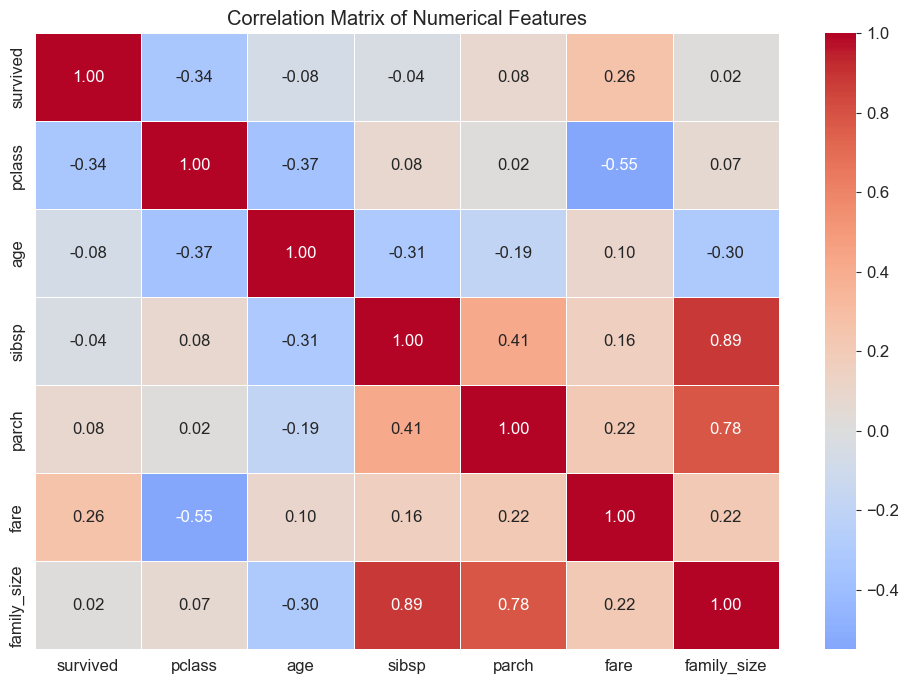

In [13]:

# 5. Correlation Analysis
plt.figure(figsize=(12, 8))
# Calculate correlation matrix for numerical features
corr = df.select_dtypes(include=['int64', 'float64']).corr()
# Plot heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

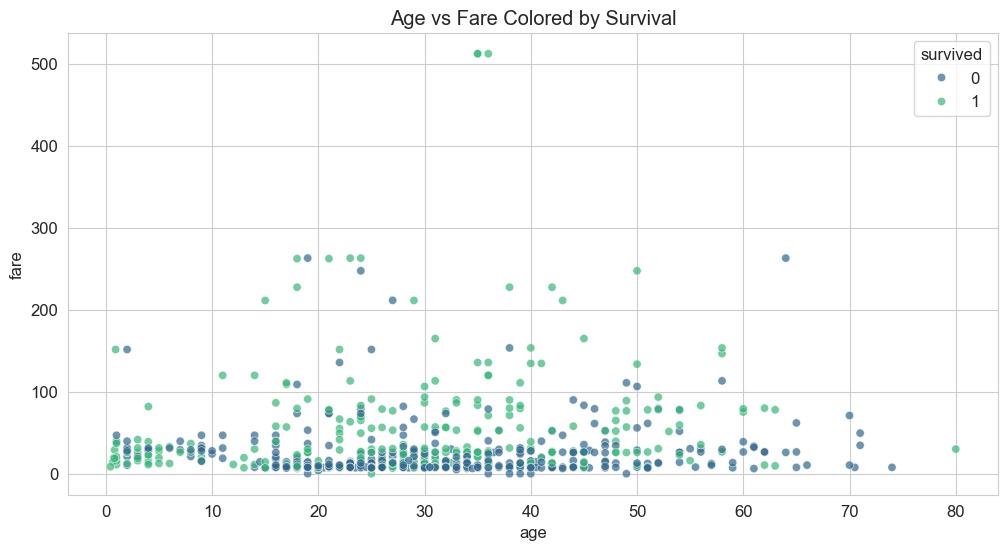

In [14]:


# 6. Age vs Fare with Survival
plt.figure(figsize=(12, 6))
sns.scatterplot(x='age', y='fare', hue='survived', data=df, palette='viridis', alpha=0.7)
plt.title('Age vs Fare Colored by Survival')
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_8916\3279253592.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='survived', y=col, data=df, palette='viridis')
C:\Users\hp\AppData\Local\Temp\ipykernel_8916\3279253592.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='survived', y=col, data=df, palette='viridis')
C:\Users\hp\AppData\Local\Temp\ipykernel_8916\3279253592.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='survived', y=col, data=df, palette='viridis')
C:\Users\hp\AppData\Local\Temp\ipykernel_8916\3279253592.py:5: FutureWarn

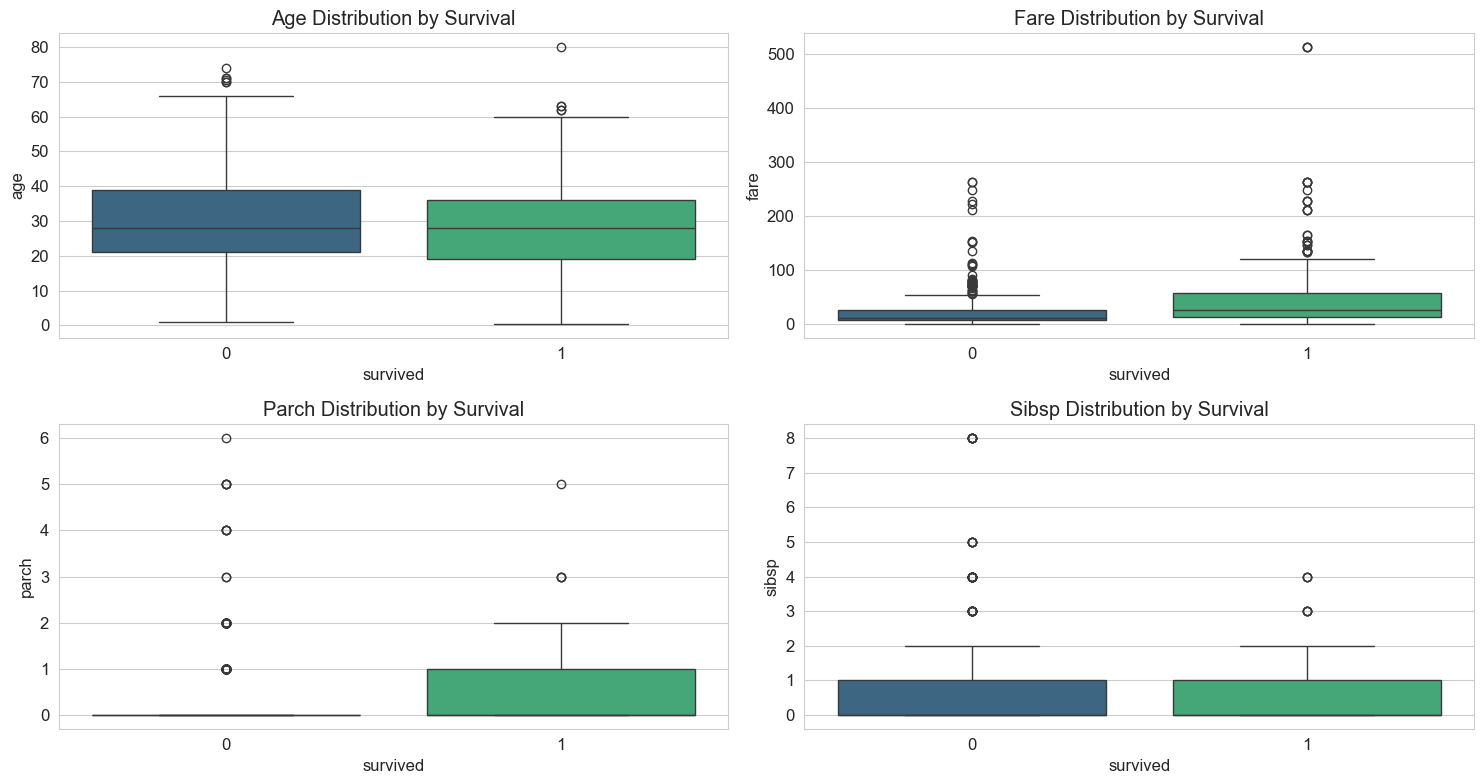

In [15]:

# 7. Boxplots for Numerical Features by Survival
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='survived', y=col, data=df, palette='viridis')
    plt.title(f'{col.capitalize()} Distribution by Survival')
plt.tight_layout()
plt.show()


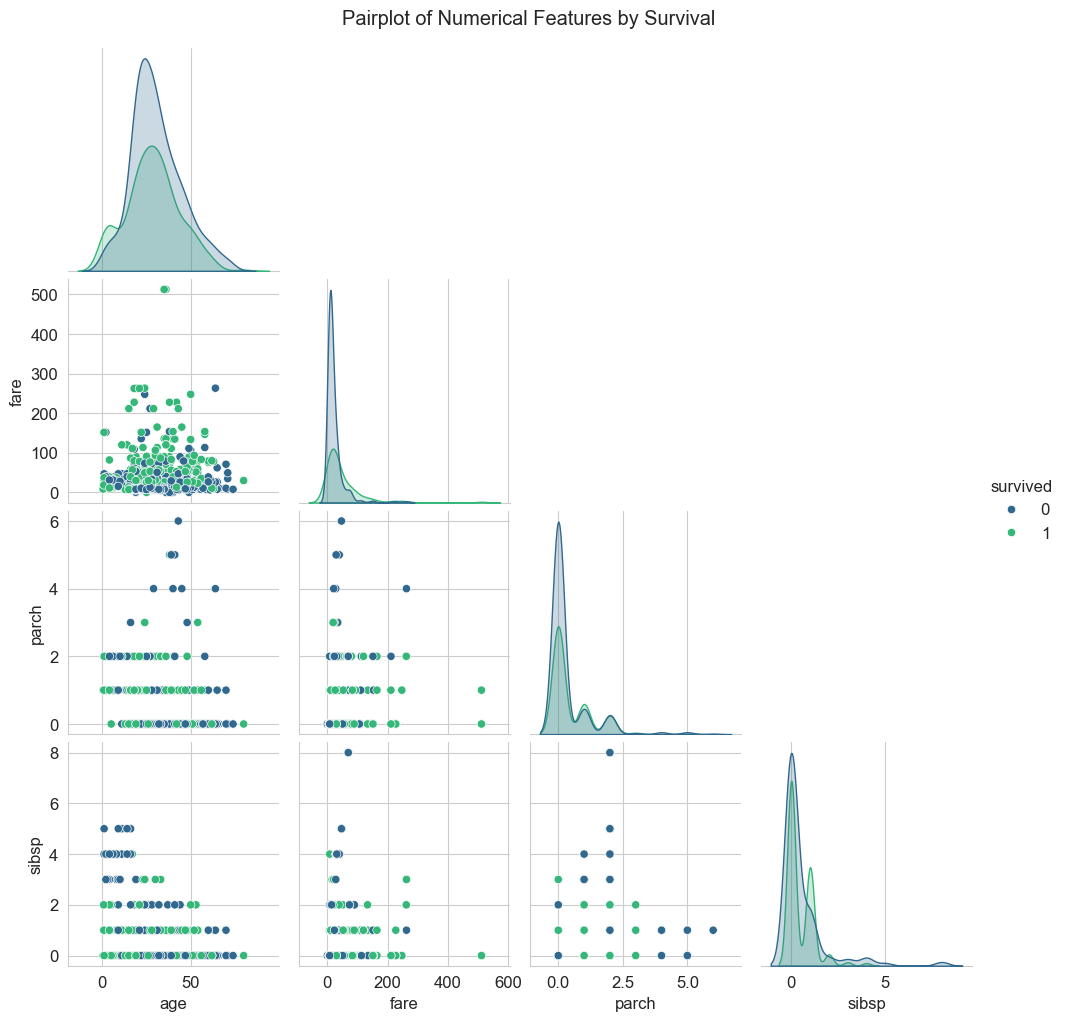

In [16]:

# 8. Pairplot for Numerical Features
sns.pairplot(df[numerical_cols + ['survived']], hue='survived', palette='viridis', corner=True)
plt.suptitle('Pairplot of Numerical Features by Survival', y=1.02)
plt.show()

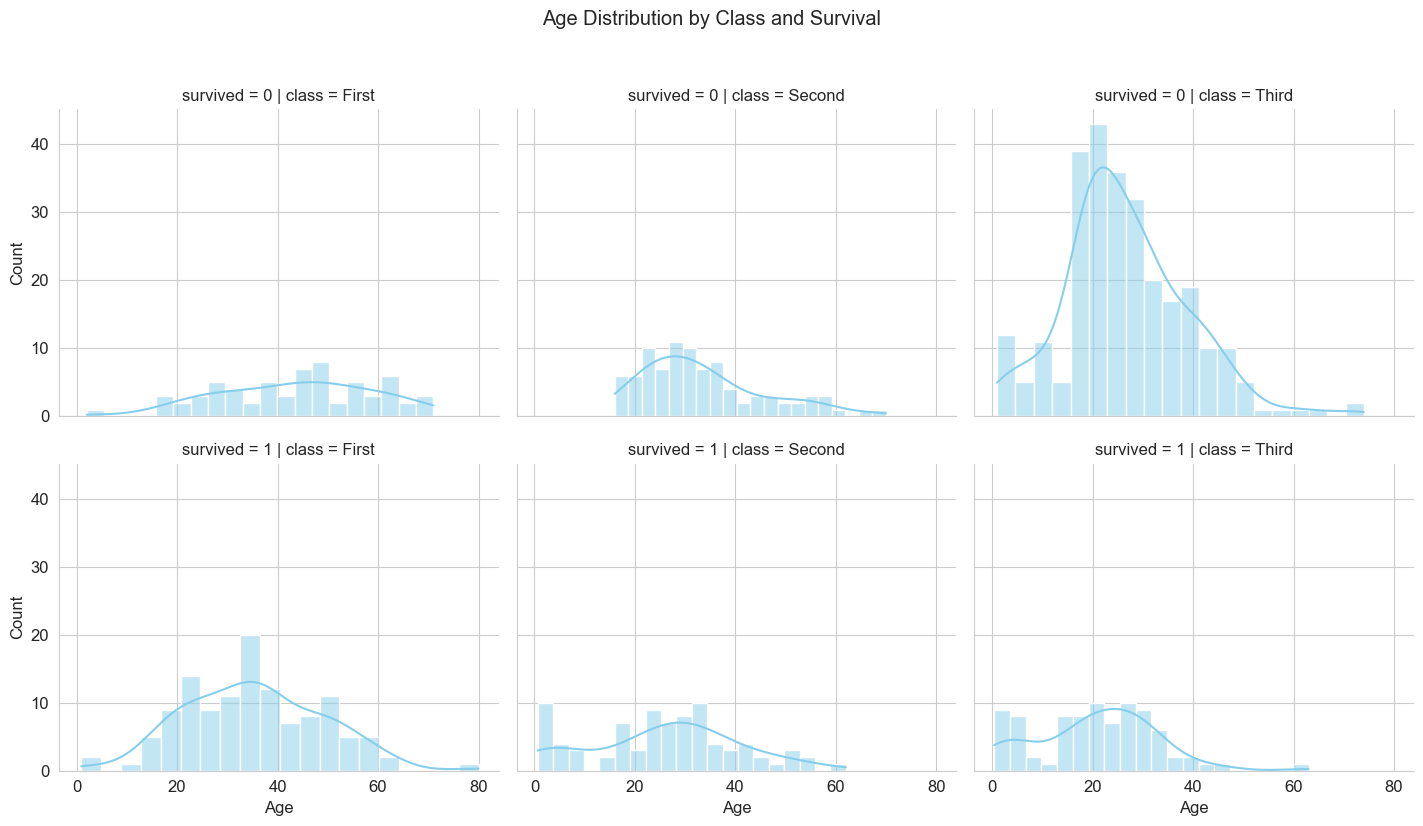

In [17]:

# 9. Advanced Visualization - FacetGrid for Age Distribution by Class and Survival
g = sns.FacetGrid(df, col='class', row='survived', height=4, aspect=1.2)
g.map(sns.histplot, 'age', kde=True, bins=20, color='skyblue')
g.set_axis_labels('Age', 'Count')
g.fig.suptitle('Age Distribution by Class and Survival', y=1.03)
plt.tight_layout()
plt.show()

In [18]:

# =============================================
# OUTLIER DETECTION
# =============================================
print("\n" + "="*80)
print("OUTLIER DETECTION USING Z-SCORE")
print("="*80)
numerical_df = df.select_dtypes(include=['int64', 'float64'])
z_scores = stats.zscore(numerical_df.dropna())
abs_z_scores = np.abs(z_scores)
outliers = (abs_z_scores > 3).sum(axis=0)
print(outliers[outliers > 0].sort_values(ascending=False))


OUTLIER DETECTION USING Z-SCORE
sibsp          23
family_size    18
fare           18
parch          15
age             2
dtype: int64


In [19]:

# =============================================
# CROSS-TABULATION ANALYSIS
# =============================================
print("\n" + "="*80)
print("CROSS-TABULATION ANALYSIS")
print("="*80)
print("\nSurvival Rate by Sex and Class:")
print(pd.crosstab(index=[df['sex'], df['class']], columns=df['survived'], 
                  margins=True, margins_name='Total', normalize='index').round(4)*100)

print("\nSurvival Rate by Age Group and Sex:")
print(pd.crosstab(index=[df['age_group'], df['sex']], columns=df['survived'], 
                  margins=True, margins_name='Total', normalize='index').round(4)*100)


CROSS-TABULATION ANALYSIS

Survival Rate by Sex and Class:
survived           0      1
sex    class               
female First    3.19  96.81
       Second   7.89  92.11
       Third   50.00  50.00
male   First   63.11  36.89
       Second  84.26  15.74
       Third   86.46  13.54
Total          61.62  38.38

Survival Rate by Age Group and Sex:
survived                0      1
age_group   sex                 
Child       female  32.35  67.65
            male    66.20  33.80
Young Adult female  24.44  75.56
            male    84.44  15.56
Adult       female  22.09  77.91
            male    77.42  22.58
Senior      female   5.88  94.12
            male    87.23  12.77
Total               59.38  40.62


In [21]:

# KEY FINDINGS SUMMARY
# =============================================
print("\n" + "="*80)
print("KEY FINDINGS SUMMARY")
print("="*80)
print("1. Missing Values:")
print("   - 'deck' has 77.1% missing values")
print("   - 'age' has 19.87% missing values")
print("   - 'embarked' has 0.22% missing values")

print("\n2. Survival Rate:")
print(f"   - Overall survival rate: {df['survived'].mean()*100:.1f}%")
print("   - Female survival rate significantly higher than male")
print("   - First class passengers had much higher survival rate")

print("\n3. Key Correlations:")
print("   - Fare and survival show positive correlation (0.26)")
print("   - Pclass and survival show negative correlation (-0.34)")

print("\n4. Interesting Patterns:")
print("   - Children (especially in 1st/2nd class) had high survival rates")
print("   - Passengers traveling alone had lower survival rates")
print("   - Most outliers found in 'fare' feature")


KEY FINDINGS SUMMARY
1. Missing Values:
   - 'deck' has 77.1% missing values
   - 'age' has 19.87% missing values
   - 'embarked' has 0.22% missing values

2. Survival Rate:
   - Overall survival rate: 38.4%
   - Female survival rate significantly higher than male
   - First class passengers had much higher survival rate

3. Key Correlations:
   - Fare and survival show positive correlation (0.26)
   - Pclass and survival show negative correlation (-0.34)

4. Interesting Patterns:
   - Children (especially in 1st/2nd class) had high survival rates
   - Passengers traveling alone had lower survival rates
   - Most outliers found in 'fare' feature


# Removing Duplicates in Pandas

In [ ]:
To remove duplicates from your DataFrame, you can use pandas'
 built-in methods. Here's how to do it properly:

 # Basic Duplicate Removal

In [22]:
# Remove exact duplicate rows (all columns must match)
df_clean = df.drop_duplicates()

# More Advanced Options

1. Remove duplicates based on specific columns

In [ ]:
# Remove rows where specific columns have duplicate values
df_clean = df.drop_duplicates(subset=['column1', 'column2'])

2. Keep first or last occurrence

In [24]:
# Keep the first occurrence of duplicates
df_first = df.drop_duplicates(keep='first')

# Keep the last occurrence of duplicates
df_last = df.drop_duplicates(keep='last')

3. Remove all duplicates (don't keep any)

In [25]:
# Remove all rows that have duplicates
df_no_duplicates = df.drop_duplicates(keep=False)

Checking for Duplicates Before Removal

In [ ]:
You might want to examine duplicates before removing them:

In [26]:
# View duplicate rows (keeping first occurrence as False)
duplicates = df[df.duplicated(keep=False)]

# Sort to see duplicates together
duplicates_sorted = duplicates.sort_values(by=list(df.columns))

print(f"Found {len(duplicates)} duplicate rows:")
print(duplicates_sorted)

Found 160 duplicate rows:
     survived  pclass   sex   age  sibsp  parch     fare embarked   class  \
64          0       1  male   NaN      0      0  27.7208        C   First   
295         0       1  male   NaN      0      0  27.7208        C   First   
144         0       2  male  18.0      0      0  11.5000        S  Second   
757         0       2  male  18.0      0      0  11.5000        S  Second   
658         0       2  male  23.0      0      0  13.0000        S  Second   
..        ...     ...   ...   ...    ...    ...      ...      ...     ...   
838         1       3  male  32.0      0      0  56.4958        S   Third   
643         1       3  male   NaN      0      0  56.4958        S   Third   
692         1       3  male   NaN      0      0  56.4958        S   Third   
65          1       3  male   NaN      1      1  15.2458        C   Third   
709         1       3  male   NaN      1      1  15.2458        C   Third   

     who  adult_male deck  embark_town alive  alo

Important Notes:

1. By default, drop_duplicates() considers all columns when identifying duplicates

2.The operation returns a new DataFrame unless you use inplace=True

3.For large DataFrames, consider using subset parameter to check only relevant columns

Remember that missing values (NaN) are treated as equal to other NaN values when identifying duplicates

# how to scale the age data in titanic using min-max scaling method

- Min-Max Scaling of Age Data in Titanic Dataset

Min-Max scaling (also called normalization) transforms features to a fixed range, typically [0, 1]. Here's how to scale the 'age' column in the Titanic dataset:

Method 1: Using Scikit-Learn's MinMaxScaler (Recommended)

In [27]:
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import pandas as pd

# Load the dataset
df = sns.load_dataset("titanic")

# Create a copy of the age column for demonstration
df['age_original'] = df['age'].copy()

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Reshape the age data (scikit-learn expects 2D array)
age_data = df['age'].values.reshape(-1, 1)

# Fit and transform the data
df['age_scaled'] = scaler.fit_transform(age_data)

# Display results
print(df[['age_original', 'age_scaled']].head())

   age_original  age_scaled
0          22.0    0.271174
1          38.0    0.472229
2          26.0    0.321438
3          35.0    0.434531
4          35.0    0.434531


# Method 2: Manual Calculation (Without Scikit-Learn)

In [29]:
# Manual min-max scaling
min_age = df['age'].min()
max_age = df['age'].max()

df['age_scaled_manual'] = (df['age'] - min_age) / (max_age - min_age)

# Verify results
print(df[['age_original', 'age_scaled', 'age_scaled_manual']].head())

   age_original  age_scaled  age_scaled_manual
0          22.0    0.271174           0.271174
1          38.0    0.472229           0.472229
2          26.0    0.321438           0.321438
3          35.0    0.434531           0.434531
4          35.0    0.434531           0.434531


# Method 3: Using pandas/numpy only

In [30]:
import numpy as np

# Using numpy for vectorized operations
df['age_scaled_numpy'] = (df['age'] - np.min(df['age'])) / (np.max(df['age']) - np.min(df['age']))

# Verify results
print(df[['age_original', 'age_scaled', 'age_scaled_manual', 'age_scaled_numpy']].head())

   age_original  age_scaled  age_scaled_manual  age_scaled_numpy
0          22.0    0.271174           0.271174          0.271174
1          38.0    0.472229           0.472229          0.472229
2          26.0    0.321438           0.321438          0.321438
3          35.0    0.434531           0.434531          0.434531
4          35.0    0.434531           0.434531          0.434531


#  Handling Missing Values

In [ ]:
Handling Missing Values

In [31]:
# Option 1: Fill missing values before scaling
df['age_filled'] = df['age'].fillna(df['age'].median())  # using median
df['age_filled_scaled'] = (df['age_filled'] - df['age_filled'].min()) / (df['age_filled'].max() - df['age_filled'].min())

# Option 2: Scale only non-missing values (will leave NaNs)
df['age_scaled_with_nan'] = (df['age'] - df['age'].min()) / (df['age'].max() - df['age'].min())

print(df[['age', 'age_filled', 'age_filled_scaled', 'age_scaled_with_nan']].head())

    age  age_filled  age_filled_scaled  age_scaled_with_nan
0  22.0        22.0           0.271174             0.271174
1  38.0        38.0           0.472229             0.472229
2  26.0        26.0           0.321438             0.321438
3  35.0        35.0           0.434531             0.434531
4  35.0        35.0           0.434531             0.434531


# Visualizing Before and After Scaling

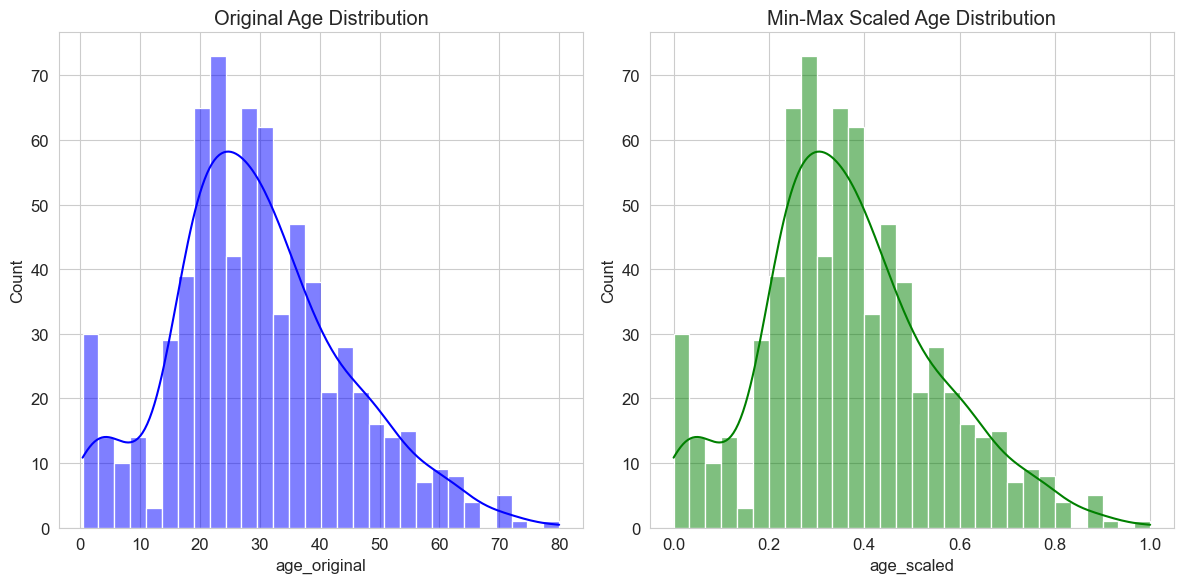

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['age_original'], kde=True, color='blue', bins=30)
plt.title('Original Age Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df['age_scaled'], kde=True, color='green', bins=30)
plt.title('Min-Max Scaled Age Distribution')

plt.tight_layout()
plt.show()

# Key Points:

1. Min-Max scaling transforms values to range [0, 1] using the formula:

In [ ]:
X_scaled = (X - X_min) / (X_max - X_min)
Scikit-Learn's MinMaxScaler is preferred because:

It stores the scaling parameters (min/max) for later use

Can easily inverse transform if needed

Handles edge cases consistently

For the Titanic dataset specifically:

Age ranges from 0.42 to 80 years

After scaling, 0.42 becomes ~0 and 80 becomes 1

A 30-year-old would be scaled to (30-0.42)/(80-0.42) ≈ 0.372